In [ ]:
# Name : T.Anil
# Roll No : AM.EN.U4CSE19357
# Batch : CSE-D

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from csv import reader
from sklearn import preprocessing
import seaborn as sns

data=pd.read_csv("Date and model wise sale.csv")
data.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [13]:
data.shape

(46116, 3)

In [14]:
data.isnull().values.any()

False

In [15]:
array=pd.DataFrame(data)
num=array.to_numpy()

In [16]:
# Standardization
scalar=StandardScaler()
data["Normalized Count"]=scalar.fit_transform(data["Count"].values.reshape(-1,1))
print("Data after standardization : \n")
print(data.describe())


Data after standardization : 

              Count  Normalized Count
count  46116.000000      4.611600e+04
mean      96.690108      8.295284e-15
std      315.065946      1.000011e+00
min        1.000000     -3.037178e-01
25%        3.000000     -2.973699e-01
50%       14.000000     -2.624562e-01
75%       67.000000     -9.423560e-02
max     6678.000000      2.088890e+01


In [17]:
#Normalization 

x=np.array(data["Count"])
normalized_array=preprocessing.normalize([x])
print("Normalized Array: \n ",normalized_array)
print(pd.DataFrame(normalized_array[0]).describe())

Normalized Array: 
  [[7.06484333e-05 4.23890600e-05 5.65187466e-05 ... 7.06484333e-05
  1.41296867e-05 1.41296867e-05]]
                  0
count  46116.000000
mean       0.001366
std        0.004452
min        0.000014
25%        0.000042
50%        0.000198
75%        0.000947
max        0.094358


In [18]:
#Data Summarization 

data.describe()


,Count,Normalized Count
count,46116.000000,4.611600e+04
mean,96.690108,8.295284e-15
std,315.065946,1.000011e+00
min,1.000000,-3.037178e-01
25%,3.000000,-2.973699e-01
50%,14.000000,-2.624562e-01
75%,67.000000,-9.423560e-02
max,6678.000000,2.088890e+01


In [19]:
data.head()

,Date,Model,Count,Normalized Count
0,31-Aug-16,M45,5,-0.291022
1,31-Aug-16,M121,3,-0.297370
2,31-Aug-16,M122,4,-0.294196
3,31-Aug-16,M91,10,-0.275152
4,31-Aug-16,M66,57,-0.125975


In [20]:
data.to_csv("dataset.csv")

In [21]:
gp_model = data.groupby('Model')['Count'].apply(lambda x: x.sum())
top = gp_model.head(5)
last = gp_model.tail(5)



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


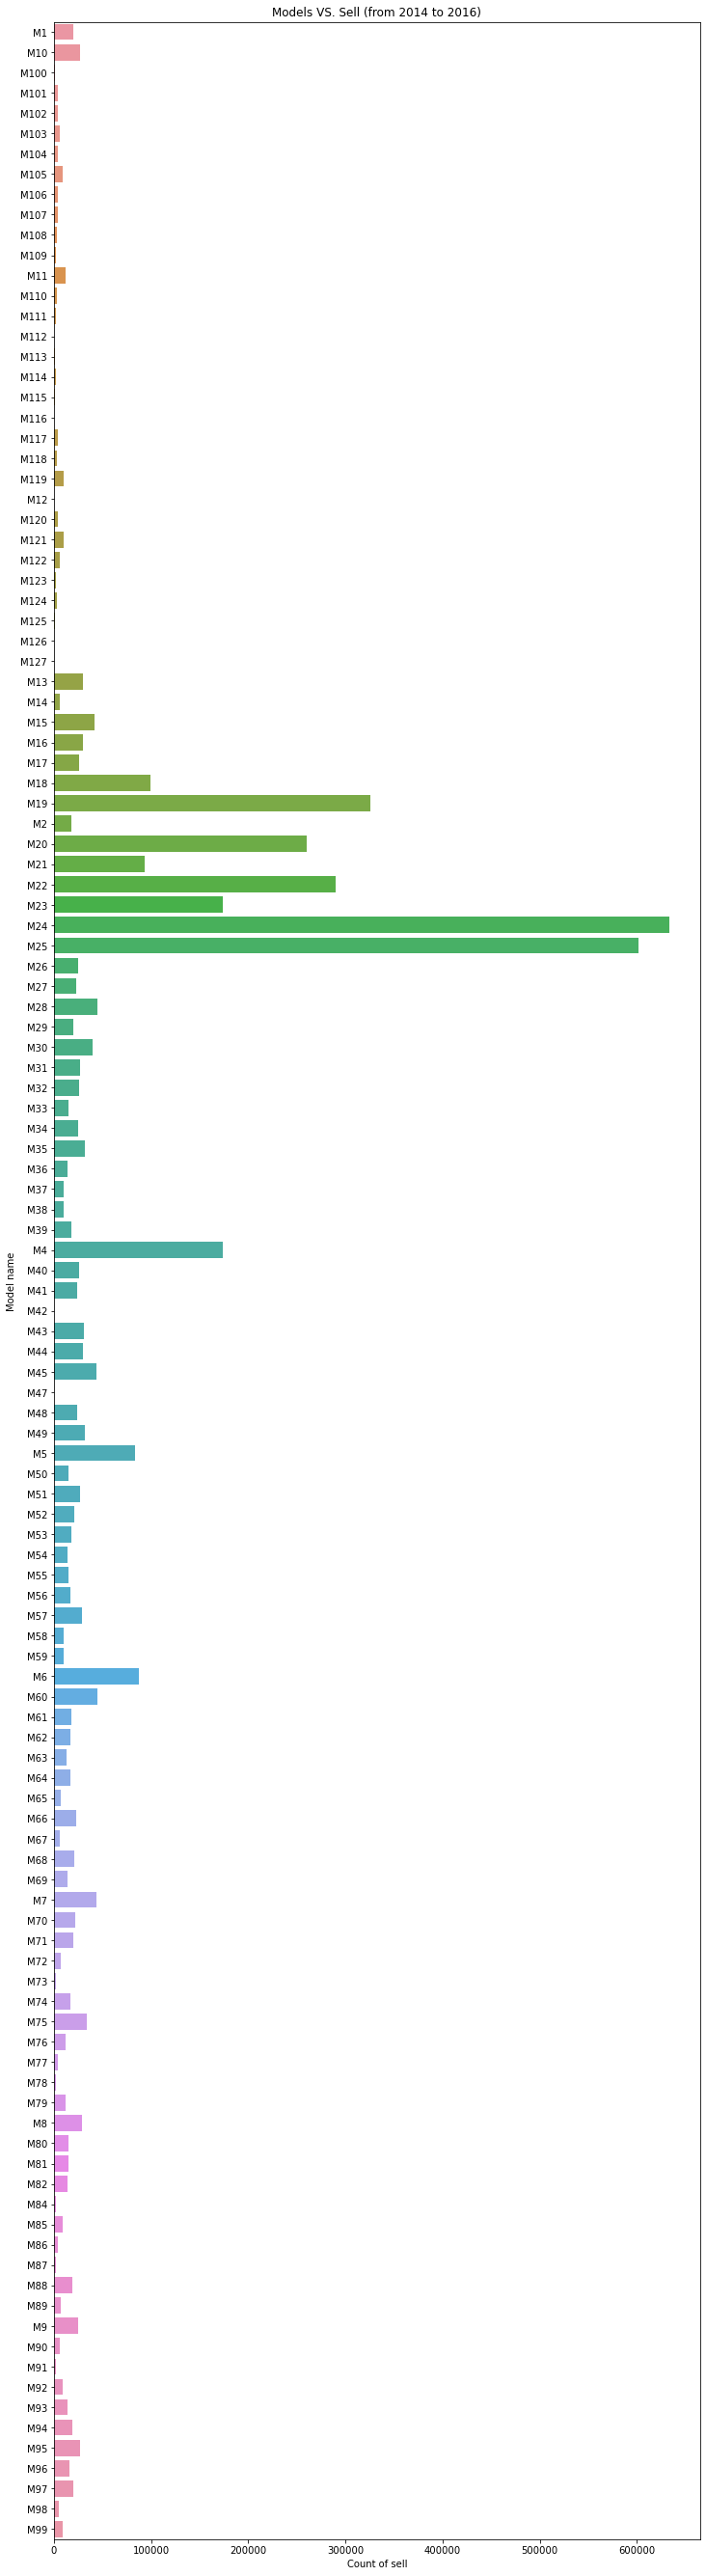

In [22]:
f, ax = plt.subplots(figsize=(12, 48))
ax=sns.barplot(gp_model, gp_model.index,orient='h')
ax.set(title='Models VS. Sell (from 2014 to 2016)',xlabel='Count of sell', ylabel='Model name')
plt.show()

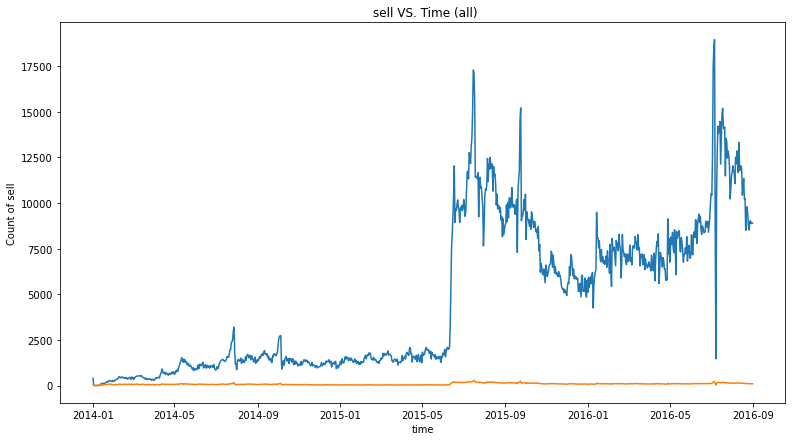

In [23]:
data['Date'] = pd.to_datetime(data['Date']) 
gp_time = data.groupby('Date')['Count'].apply(lambda x: x.sum())
gp_time_mean = data.groupby('Date')['Count'].apply(lambda x: x.count())

plt.figure(figsize=(13,7))
plt.title(' sell VS. Time (all)')
plt.ylabel('Count of sell')
plt.xlabel('time')
plt.plot(gp_time.index,gp_time)
plt.plot(gp_time_mean.index,gp_time/gp_time_mean)
plt.show()

In [24]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [25]:
sell_by_year = data.groupby('year')['Count'].sum()
sell_by_year

year
2014     370989
2015    2024037
2016    2063935
Name: Count, dtype: int64

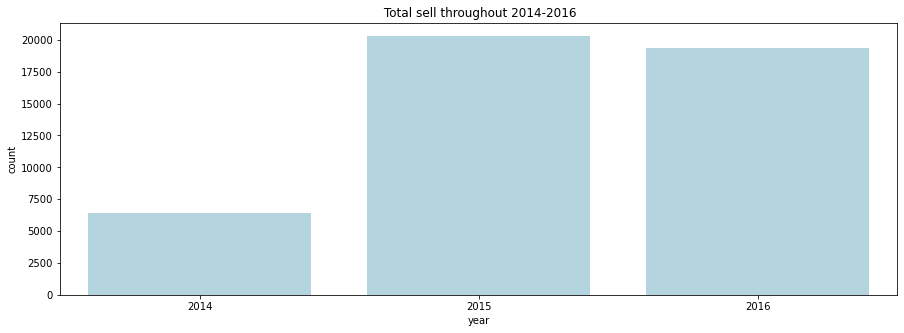

In [26]:
plt.figure(figsize=(15,5))
plt.title(' Total sell throughout 2014-2016')
sns.countplot(x='year', data=data, color='lightblue');

<AxesSubplot:title={'center':' Total Sale on each month throughout 2014-2016'}, xlabel='month', ylabel='Sale amount'>

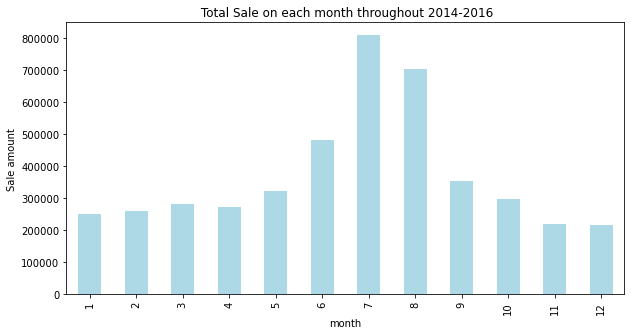

In [27]:
plt.figure(figsize=(10,5))
plt.title(' Total Sale on each month throughout 2014-2016')
plt.ylabel('Sale amount')
data.groupby('month').Count.sum().plot(kind='bar',color='lightblue')

In [28]:
data_2014 = data[data["Date"].dt.year == 2014]
data_2015 = data[data["Date"].dt.year == 2015]
data_2016 = data[data["Date"].dt.year == 2016]

<AxesSubplot:title={'center':' Sale on each month of 2014 '}, xlabel='month', ylabel='Sale amount'>

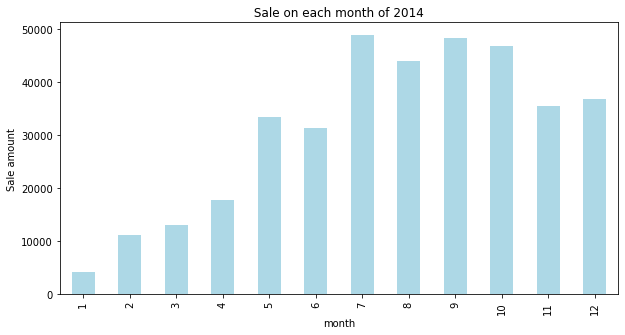

In [29]:
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2014 ')
plt.ylabel('Sale amount')
data_2014.groupby('month').Count.sum().plot(kind='bar', color='lightblue')

<AxesSubplot:title={'center':' Sale on each month of 2015 '}, xlabel='month', ylabel='Sale amount'>

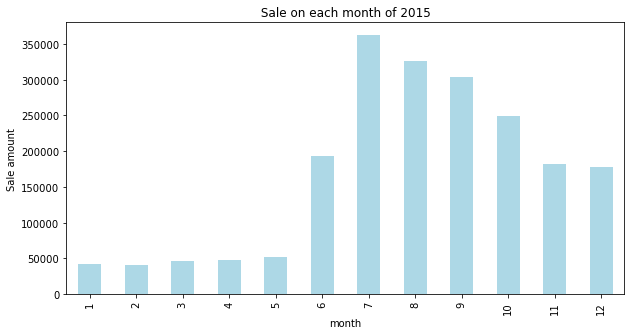

In [30]:
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2015 ')
plt.ylabel('Sale amount')
data_2015.groupby('month').Count.sum().plot( kind='bar',color='lightblue')

<AxesSubplot:title={'center':' Sale on each month of 2016 '}, xlabel='month', ylabel='Sale amount'>

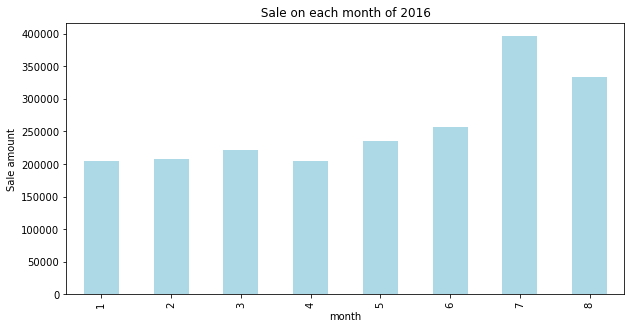

In [31]:
plt.figure(figsize=(10,5))
plt.title(' Sale on each month of 2016 ')
plt.ylabel('Sale amount')
data_2016.groupby('month').Count.sum().plot(kind='bar', color='lightblue')

In [32]:
data.to_csv("new.csv")

In [33]:
data.describe()

,Count,Normalized Count,day,month,year
count,46116.000000,4.611600e+04,46116.000000,46116.000000,46116.000000
mean,96.690108,8.295284e-15,15.818414,6.272422,2015.280575
std,315.065946,1.000011e+00,8.814763,3.220222,0.693469
min,1.000000,-3.037178e-01,1.000000,1.000000,2014.000000
25%,3.000000,-2.973699e-01,8.000000,4.000000,2015.000000
50%,14.000000,-2.624562e-01,16.000000,6.000000,2015.000000
75%,67.000000,-9.423560e-02,23.000000,9.000000,2016.000000
max,6678.000000,2.088890e+01,31.000000,12.000000,2016.000000


In [34]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
categ=['Date','Model']
data[categ] = data[categ].apply(label.fit_transform)

In [35]:
data.head()

,Date,Model,Count,Normalized Count,day,month,year
0,970,66,5,-0.291022,31,8,2016
1,970,25,3,-0.297370,31,8,2016
2,970,26,4,-0.294196,31,8,2016
3,970,115,10,-0.275152,31,8,2016
4,970,88,57,-0.125975,31,8,2016


In [36]:
data.to_csv("new.csv")

In [37]:
data.describe()

,Date,Model,Count,Normalized Count,day,month,year
count,46116.000000,46116.000000,46116.000000,4.611600e+04,46116.000000,46116.000000,46116.000000
mean,639.046166,62.638997,96.690108,8.295284e-15,15.818414,6.272422,2015.280575
std,229.741376,34.709037,315.065946,1.000011e+00,8.814763,3.220222,0.693469
min,0.000000,0.000000,1.000000,-3.037178e-01,1.000000,1.000000,2014.000000
25%,480.000000,36.000000,3.000000,-2.973699e-01,8.000000,4.000000,2015.000000
50%,672.000000,65.000000,14.000000,-2.624562e-01,16.000000,6.000000,2015.000000
75%,832.000000,91.000000,67.000000,-9.423560e-02,23.000000,9.000000,2016.000000
max,970.000000,123.000000,6678.000000,2.088890e+01,31.000000,12.000000,2016.000000
